## -----------------------------> Convolutional Neural Network <-------------------------------------

###  In this notebook we will classify Different Classes of Images using a simple neural network (ANN) first and than repeat same thing with convolutional neural network.

### We will see how accuracy improves clickly when you use convolutional neural network.

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train) , (x_test,y_test) = datasets.cifar10.load_data()

In [3]:
x_train.shape , x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
y_train[:5]   # 2D array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)   # Converting 2D to 1D array
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [7]:
classes[0]

'airplane'

In [8]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

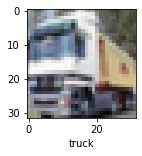

In [9]:
plot_sample(x_train,y_train,1)

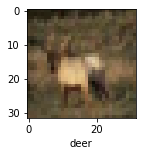

In [10]:
plot_sample(x_train,y_train,3)

In [11]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [12]:
x_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

In [13]:
x_train = x_train/255  # Normalization
x_test = x_test/255

In [14]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [15]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid'),
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics = ['accuracy'])

In [16]:
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 131s 83ms/step - loss: 1.8148 - accuracy: 0.3540
Epoch 2/5
1563/1563 [==============================] - 121s 77ms/step - loss: 1.6256 - accuracy: 0.4269
Epoch 3/5
1563/1563 [==============================] - 110s 70ms/step - loss: 1.5441 - accuracy: 0.4536
Epoch 4/5
1563/1563 [==============================] - 134s 86ms/step - loss: 1.4829 - accuracy: 0.4775
Epoch 5/5
1563/1563 [==============================] - 145s 93ms/step - loss: 1.4330 - accuracy: 0.4951


# Epochs Meaning :
### ---> Number of Iterations to be Perfomed on Trainset,so that the Model will be Learnt Well


# It used Stochastic Gradient Descent Algorithm

In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.56      0.51      1000
           1       0.47      0.72      0.57      1000
           2       0.52      0.06      0.10      1000
           3       0.37      0.32      0.34      1000
           4       0.48      0.35      0.41      1000
           5       0.51      0.23      0.31      1000
           6       0.38      0.75      0.51      1000
           7       0.52      0.55      0.53      1000
           8       0.44      0.77      0.56      1000
           9       0.67      0.26      0.37      1000

    accuracy                           0.46     10000
   macro avg       0.48      0.46      0.42     10000
weighted avg       0.48      0.46      0.42     10000



# Artificial Neural network has performed accuracy of 45.5%,

# Now lets Build Convolutional Neural network and see how accuracy improves

In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 87s 54ms/step - loss: 1.5138 - accuracy: 0.4544
Epoch 2/10
1563/1563 [==============================] - 82s 52ms/step - loss: 1.1540 - accuracy: 0.5918
Epoch 3/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.0100 - accuracy: 0.6494
Epoch 4/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9351 - accuracy: 0.6763
Epoch 5/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8794 - accuracy: 0.6951
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8292 - accuracy: 0.7123
Epoch 7/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.7902 - accuracy: 0.7247
Epoch 8/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7512 - accuracy: 0.7377
Epoch 9/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7159 - accuracy: 0.7495
Epoch 10/10
1563/1563 [==============================] - 82s 53m

In [21]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.9389 - accuracy: 0.6931


[0.938904881477356, 0.6930999755859375]

# The accuracy of CNN on Test Set if 69%

# Important Point : 
## ---------> Always Consider Test set Scores for Business Decisions (Applicable for All machine Learning and Deep Learning Problems )

In [22]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[2.5665475e-04, 6.1389539e-05, 8.4964704e-04, 8.7606078e-01,
        1.2631984e-04, 7.9686597e-02, 3.7109796e-02, 1.0762657e-04,
        5.0442885e-03, 6.9676101e-04],
       [6.4075347e-03, 1.5292134e-02, 1.0486410e-06, 3.3414231e-05,
        2.7884106e-08, 3.7110351e-06, 5.4757116e-08, 2.1776421e-07,
        9.7808540e-01, 1.7650926e-04],
       [2.9191080e-01, 2.8309224e-02, 3.2815645e-03, 3.0761002e-02,
        9.6789730e-04, 2.3968632e-03, 1.6919898e-03, 1.8762918e-04,
        6.1481977e-01, 2.5673240e-02],
       [8.3317912e-01, 1.7712105e-03, 9.3092799e-02, 5.0968942e-03,
        7.8562740e-03, 1.7532845e-04, 1.7787874e-03, 1.2244551e-03,
        5.5347327e-02, 4.7786988e-04],
       [9.9723366e-06, 9.1775428e-06, 8.5534733e-03, 3.3109725e-02,
        3.3190110e-01, 2.6231739e-03, 6.2368798e-01, 1.4500591e-05,
        9.0221321e-05, 7.6601094e-07]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [24]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [25]:
y_test = y_test.reshape(-1,)   # Converting 2D to 1D array
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

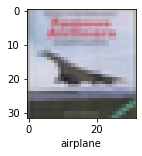

In [26]:
plot_sample(x_test, y_test,3)

In [27]:
classes[y_classes[3]]

'airplane'

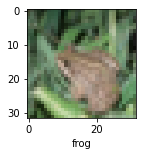

In [28]:
plot_sample(x_test, y_test,4)

In [29]:
classes[y_classes[4]]

'frog'

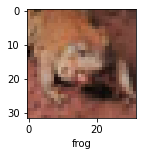

In [30]:
plot_sample(x_test, y_test,5)

In [31]:
classes[y_classes[5]]

'frog'

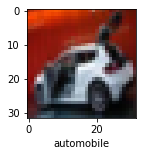

In [32]:
plot_sample(x_test, y_test,6)

In [33]:
classes[y_classes[6]]

'automobile'